# Classification test  
Compare `HTODemux` vs `scito.preprocess.ScitoFrame.resolveMux` classification

In [1]:
from scito import preprocess
import seaborn as sns
import scanpy as sc
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import time


/Users/antonogorodnikov/anaconda3/envs/scito/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
path = '/Users/antonogorodnikov/Documents/Work/DataSci/SCITO-seq/tests/100k_filtered_feature_bc_matrix.h5'
verbose = True

In [3]:
adata = sc.read_10x_h5(path, gex_only=False)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [4]:
corr_var = pd.read_csv("/Users/antonogorodnikov/Documents/Work/DataSci/SCITO-seq/tests/var.csv", index_col=0)

In [5]:
adata.var = corr_var

In [6]:
# very basic benchmarking
start = time.time()
lol = preprocess.ScitoFrame(from_scanpy=True, adata=adata)
lol_2 = lol.resolveMux(batchid_string="barcode",
                        positiveQuantile=0.99,
                        n_clust=None,
                        n_init=100,
                        kfunc="kmeans",
                        maxneighbor=100,
                        seed=42,
                        keep_input=True,
                        verbose=True)


end = time.time()
print(end - start)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/antonogorodnikov/anaconda3/envs/scito/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
Transforming to str index.


Keeping linear scale data for computing average
Performing k-means clustering


Transforming to str index.
/Users/antonogorodnikov/anaconda3/envs/scito/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/Users/antonogorodnikov/anaconda3/envs/scito/lib/python3.7/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Cutoff for barcode1: 1233 reads
Cutoff for barcode2: 241 reads


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Cutoff for barcode3: 90 reads


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Cutoff for barcode4: 273 reads


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Cutoff for barcode5: 388 reads


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Cutoff for barcode6: 357 reads


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Cutoff for barcode7: 324 reads


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Cutoff for barcode8: 269 reads


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Cutoff for barcode9: 758 reads


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Cutoff for barcode10: 38 reads


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Keeping sparse matrix with antibody expression only. Target = self.input
Assigning best guesses
14.913728952407837


In [7]:
lol.__dict__.keys()
lol.drop_assign.obs
scito_df = lol.drop_assign.obs
scito_df

,batch_cluster,assignment,best_guess,expression
AAACCCAAGAAGTCTA-1,2,MTP,"(barcode3, barcode2)","(2423.0, 746.0)"
AAACCCAAGAGGTCGT-1,8,MTP,"(barcode6, barcode9)","(1232.0, 586.0)"
AAACCCAAGCATCCTA-1,8,SNG,"(barcode6,)","(611.0,)"
AAACCCAAGCATTGAA-1,5,SNG,"(barcode10,)","(877.0,)"
AAACCCAAGGAAGTGA-1,4,MTP,"(barcode5, barcode6)","(701.0, 443.0)"
...,...,...,...,...
TTTGTTGTCCATTTGT-1,4,SNG,"(barcode5,)","(424.0,)"
TTTGTTGTCCCAACTC-1,3,SNG,"(barcode7,)","(1097.0,)"
TTTGTTGTCCGAGGCT-1,3,SNG,"(barcode1,)","(788.0,)"
TTTGTTGTCGTTCGCT-1,0,NEG,(),()


In [8]:
scito_df.loc[scito_df['assignment'] == "NEG", 'classif'] = 0
scito_df.loc[scito_df['assignment'] == "SNG", 'classif'] = 1
scito_df.loc[scito_df['assignment'] == "MTP", 'classif'] = 2
scito_df.drop(scito_df.columns[~scito_df.columns.isin(['classif','best_guess'])], axis=1, inplace=True)
scito_df

,best_guess,classif
AAACCCAAGAAGTCTA-1,"(barcode3, barcode2)",2.0
AAACCCAAGAGGTCGT-1,"(barcode6, barcode9)",2.0
AAACCCAAGCATCCTA-1,"(barcode6,)",1.0
AAACCCAAGCATTGAA-1,"(barcode10,)",1.0
AAACCCAAGGAAGTGA-1,"(barcode5, barcode6)",2.0
...,...,...
TTTGTTGTCCATTTGT-1,"(barcode5,)",1.0
TTTGTTGTCCCAACTC-1,"(barcode7,)",1.0
TTTGTTGTCCGAGGCT-1,"(barcode1,)",1.0
TTTGTTGTCGTTCGCT-1,(),0.0


## Import HTODemux output

In [9]:
hto = pd.read_csv("/Users/antonogorodnikov/Documents/Work/DataSci/SCITO-seq/tests/benchmark/hto_classif_1.tsv", sep='\t')

In [10]:
hto

,orig.ident,nCount_RNA,nFeature_RNA,nCount_HTO,nFeature_HTO,HTO_maxID,HTO_secondID,HTO_margin,HTO_classification,HTO_classification.global,hash.ID
0,SeuratProject,3470,177,3470,10,Batch3,Batch2,1.177714,Batch2_Batch3,Doublet,Doublet
1,SeuratProject,2601,159,2601,10,Batch6,Batch9,0.742842,Batch6_Batch9,Doublet,Doublet
2,SeuratProject,905,152,905,10,Batch6,Batch3,2.209203,Batch6,Singlet,Batch6
3,SeuratProject,1256,176,1256,10,Batch10,Batch3,2.647492,Batch10,Singlet,Batch10
4,SeuratProject,1587,197,1587,10,Batch5,Batch6,0.458806,Batch5_Batch6,Doublet,Doublet
...,...,...,...,...,...,...,...,...,...,...,...
35366,SeuratProject,727,160,727,10,Batch5,Batch1,2.198212,Negative,Negative,Negative
35367,SeuratProject,1541,165,1541,10,Batch7,Batch4,2.236985,Batch7,Singlet,Batch7
35368,SeuratProject,1611,165,1611,10,Batch1,Batch7,0.284236,Batch1,Singlet,Batch1
35369,SeuratProject,1016,143,1016,10,Batch1,Batch6,3.061030,Negative,Negative,Negative


In [11]:
hto.index = lol.drop_assign.obs.index

In [12]:
hto

,orig.ident,nCount_RNA,nFeature_RNA,nCount_HTO,nFeature_HTO,HTO_maxID,HTO_secondID,HTO_margin,HTO_classification,HTO_classification.global,hash.ID
AAACCCAAGAAGTCTA-1,SeuratProject,3470,177,3470,10,Batch3,Batch2,1.177714,Batch2_Batch3,Doublet,Doublet
AAACCCAAGAGGTCGT-1,SeuratProject,2601,159,2601,10,Batch6,Batch9,0.742842,Batch6_Batch9,Doublet,Doublet
AAACCCAAGCATCCTA-1,SeuratProject,905,152,905,10,Batch6,Batch3,2.209203,Batch6,Singlet,Batch6
AAACCCAAGCATTGAA-1,SeuratProject,1256,176,1256,10,Batch10,Batch3,2.647492,Batch10,Singlet,Batch10
AAACCCAAGGAAGTGA-1,SeuratProject,1587,197,1587,10,Batch5,Batch6,0.458806,Batch5_Batch6,Doublet,Doublet
...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGTCCATTTGT-1,SeuratProject,727,160,727,10,Batch5,Batch1,2.198212,Negative,Negative,Negative
TTTGTTGTCCCAACTC-1,SeuratProject,1541,165,1541,10,Batch7,Batch4,2.236985,Batch7,Singlet,Batch7
TTTGTTGTCCGAGGCT-1,SeuratProject,1611,165,1611,10,Batch1,Batch7,0.284236,Batch1,Singlet,Batch1
TTTGTTGTCGTTCGCT-1,SeuratProject,1016,143,1016,10,Batch1,Batch6,3.061030,Negative,Negative,Negative


## Use HTODemux output as ground truth and extimate precision and recall

In [13]:
hto.loc[hto['HTO_classification.global'] == "Negative", 'classif'] = 0
hto.loc[hto['HTO_classification.global'] == "Singlet", 'classif'] = 1
hto.loc[hto['HTO_classification.global'] == "Doublet", 'classif'] = 2
hto.drop(hto.columns[~hto.columns.isin(['classif','HTO_classification'])], axis=1, inplace=True)
hto['best'] = hto['HTO_classification'].str.split(pat='_')

In [14]:
hto


,HTO_classification,classif,best
AAACCCAAGAAGTCTA-1,Batch2_Batch3,2.0,"[Batch2, Batch3]"
AAACCCAAGAGGTCGT-1,Batch6_Batch9,2.0,"[Batch6, Batch9]"
AAACCCAAGCATCCTA-1,Batch6,1.0,[Batch6]
AAACCCAAGCATTGAA-1,Batch10,1.0,[Batch10]
AAACCCAAGGAAGTGA-1,Batch5_Batch6,2.0,"[Batch5, Batch6]"
...,...,...,...
TTTGTTGTCCATTTGT-1,Negative,0.0,[Negative]
TTTGTTGTCCCAACTC-1,Batch7,1.0,[Batch7]
TTTGTTGTCCGAGGCT-1,Batch1,1.0,[Batch1]
TTTGTTGTCGTTCGCT-1,Negative,0.0,[Negative]


In [15]:
# function to parse HTO_classification and estimate number of matches
def recaller(x, y):
    try:
        x_ls = [int(re.search('\d+', i)[0]) for i in x]
        y_ls = [int(re.search('\d+', i)[0]) for i in y]
    except:
        return -1
    
    # recall per droplet
    res = len([i for i in x_ls if i in y_ls]) / len(x_ls)
    return res

In [16]:
# function to parse hto.classif and estimate number of matches
def classif_recaller(x_hto, y_scito):
    if x_hto == 0:
        return -1
    
    elif x_hto == y_scito:
        return 1
    else:
        return 0

In [17]:
recall = [recaller(hto.best[i], scito_df.best_guess[i]) for i in range(hto.shape[0])]

In [18]:
batch_id_recall = np.mean([i for i in recall if i != -1])
batch_id_recall

0.9944341953034614

In [19]:
classif_recall = [classif_recaller(hto.classif[i], scito_df.classif[i]) for i in range(hto.shape[0])]

In [20]:
drop_recall = np.mean([i for i in classif_recall if i != -1])
drop_recall

0.9818642318876833

In [21]:
# identify misclassification
id_classif = [hto.classif[i] - scito_df.classif[i] for i in range(hto.shape[0])]

In [22]:
# correct classif
id_classif.count(0)/len(id_classif)

0.974300981029657

In [23]:
# was SNG but classified as MTP
id_classif.count(-1)/len(id_classif)

0.018998614684345935

In [24]:
# was MTP but classified as SNG
id_classif.count(1)/len(id_classif)

0.0065307737977439145

In [25]:
# was NEG but classified as SNG
id_classif.count(-2)/len(id_classif)

0.0001696304882530887

In [26]:
# was NEG but classified as MTP
id_classif.count(-3)/len(id_classif)

0.0

In [27]:
id_classif.count(0)/len(id_classif) + id_classif.count(-1)/len(id_classif) + \
id_classif.count(1)/len(id_classif) + id_classif.count(-2)/len(id_classif) + \
id_classif.count(-3)/len(id_classif)

1.0

In [28]:
misclass = pd.DataFrame({"Type": ['correct', 'SNG2MTP', 'MTP2SNG', 'NEG2SNG', 'NEG2MTP'],
                        "proportion": [id_classif.count(0)/len(id_classif), id_classif.count(-1)/len(id_classif),
                                       id_classif.count(1)/len(id_classif), id_classif.count(-2)/len(id_classif),
                                       id_classif.count(-3)/len(id_classif)]})

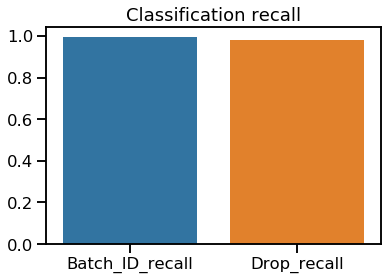

In [29]:
sns.set_context("talk")
sns.barplot(x = ["Batch_ID_recall", "Drop_recall"], y=[batch_id_recall, drop_recall])
plt.title("Classification recall")
plt.show()

In [30]:
misclass

,Type,proportion
0,correct,0.974301
1,SNG2MTP,0.018999
2,MTP2SNG,0.006531
3,NEG2SNG,0.000170
4,NEG2MTP,0.000000


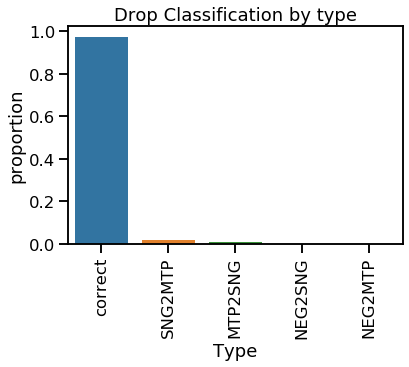

In [31]:
sns.set_context("talk")
sns.barplot(x = "Type", y='proportion', data=misclass)
plt.title("Drop Classification by type")
plt.xticks(rotation=90)
plt.show()